# **Task description**
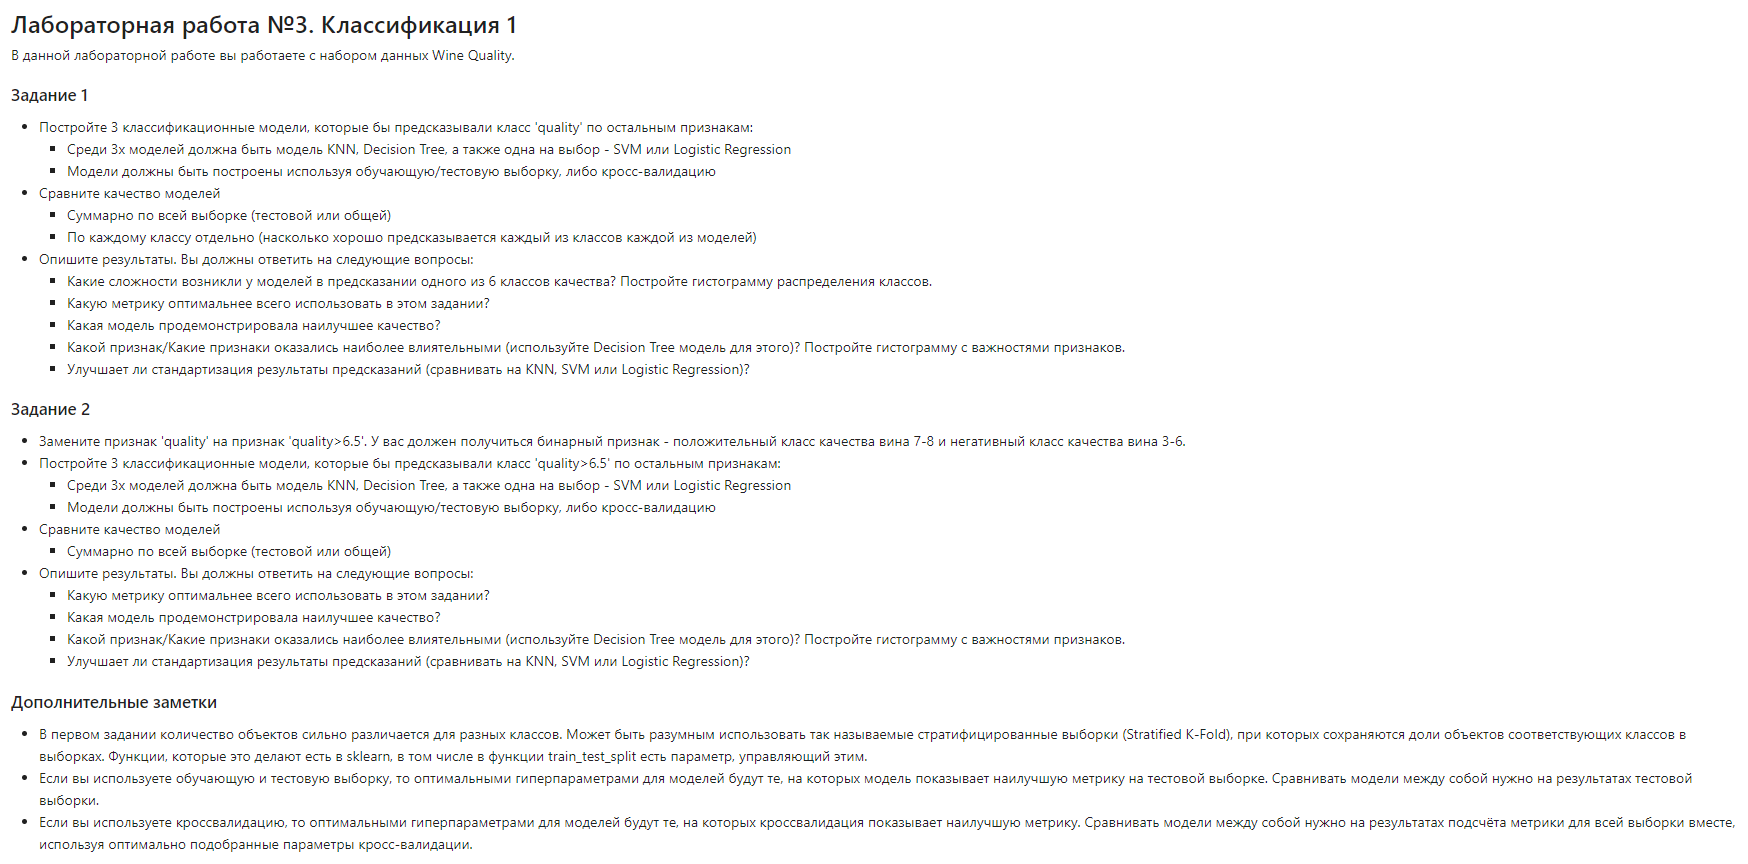

# **Load data and libraries**

In [ ]:
!wget https://www.dropbox.com/s/2gjc9mv706yc6ft/winequality-red.csv -O winequality-red.csv

--2021-11-18 10:45:29--  https://www.dropbox.com/s/2gjc9mv706yc6ft/winequality-red.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2gjc9mv706yc6ft/winequality-red.csv [following]
--2021-11-18 10:45:29--  https://www.dropbox.com/s/raw/2gjc9mv706yc6ft/winequality-red.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc151e02bbfcbc4c3bbeb7c29e87.dl.dropboxusercontent.com/cd/0/inline/BaPT2ZP1fn3MfnOMRT4xxcklsm6xLemu4Xrt0tNaiPwGbIiEs77Ony3d036HNru4_Zz4QEaEhko40byx-llsAMeSWk1hmfPC0-sWdhRTw5eeUkkS562Vjn27qZxx563CwNKoIJ7zDRrQEqBLkcBdCwxk/file# [following]
--2021-11-18 10:45:29--  https://uc151e02bbfcbc4c3bbeb7c29e87.dl.dropboxusercontent.com/cd/0/inline/BaPT2ZP1fn3MfnOMRT4xxcklsm6xLemu4Xrt0tNaiPwGbIiEs77Ony3d036HNru4_Zz4Q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snus

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Functions of evaluation**

In [ ]:
def get_score(y_test, y_pred, y_prob, multiclass=False):
  multi_class = 'ovo'
  if not multiclass:
    y_prob = y_prob[:,1]
    multi_class = 'raise'
  return {
      'accuracy': accuracy_score(y_test, y_pred),
      'recall': recall_score(y_test, y_pred, average='macro'),
      'precision': precision_score(y_test, y_pred, average='macro', labels=np.unique(y_pred)),
      'f1': f1_score(y_test, y_pred, average='macro', labels=np.unique(y_pred)),
      'roc_auc': roc_auc_score(y_test, y_prob, average='macro', multi_class = multi_class)
    }

In [ ]:
def print_score_table(X_test, y_test, models, multiclass=False):
  data = []
  for model_instance, model_name in [model.values() for model in models]:
    score = get_score(y_test, model_instance.predict(X_test), model_instance.predict_proba(X_test), multiclass)
    data.append([model_name, score['accuracy'], score['f1'], score['precision'], score['recall'], score['roc_auc']])

  results_df = pd.DataFrame(data=data, 
                          columns=['Model', 'accuracy', 'f1', 'precision', 'recall', 'roc_auc'])
  return results_df

In [ ]:
def print_confusion_matrix(y_test, y_pred):
  result = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix:')
  print(result)
  result1 = classification_report(y_test, y_pred)
  print('Classification Report:',)
  print (result1)
  result2 = accuracy_score(y_test,y_pred)
  print('Accuracy:',result2)

# **Part 1**

## **Data**

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
y.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
np.random.seed(42)

We have multiclass output, so we need to take the parameter **stratify**. When using the stratify function, train_test_split actually uses the StratifiedShuffleSplit function to split. As we can see in the documentation, StratifiedShuffleSplit has the goal of doing a split while keeping the percentage of samples for each class as we'd expect.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### **Histogram of distribution**

We need to plot histogram for output data:

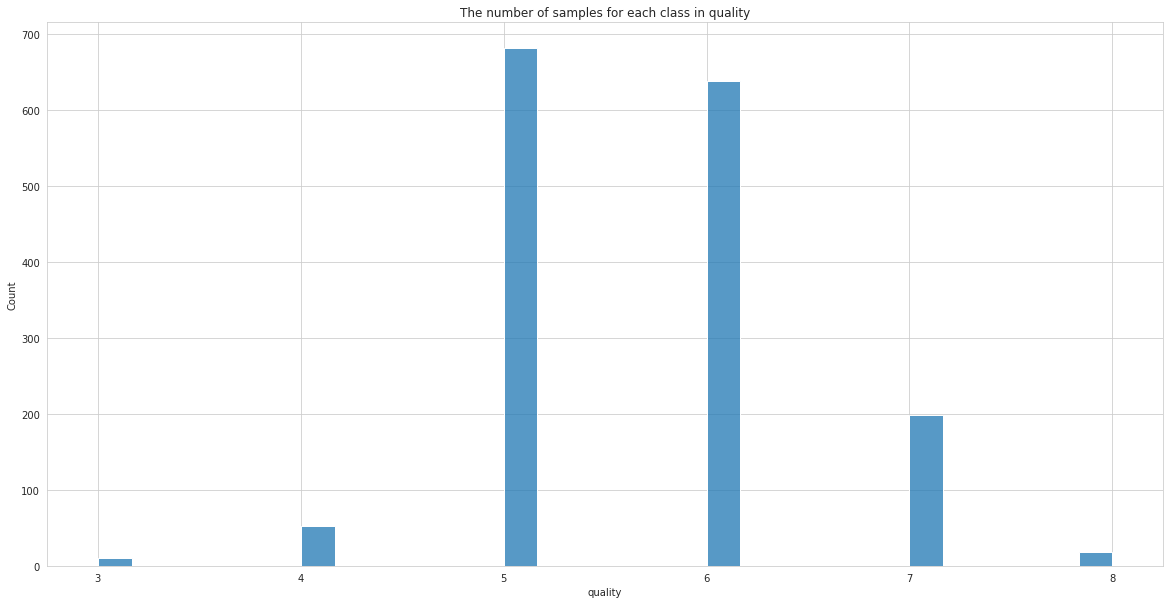

In [ ]:
plt.figure(figsize=(20, 10))
snus.set_style('whitegrid');
snus.histplot(y);
plt.title('The number of samples for each class in quality')
plt.show()

It can be clearly seen that the numbers of samples for each class in output data are considerably different. We have a lot of samples 5th and 6th classes (more 600 points), whereas the number of 3rd (bad) and 8th (great) classes are close to zero. So our models can make a huge mistake. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


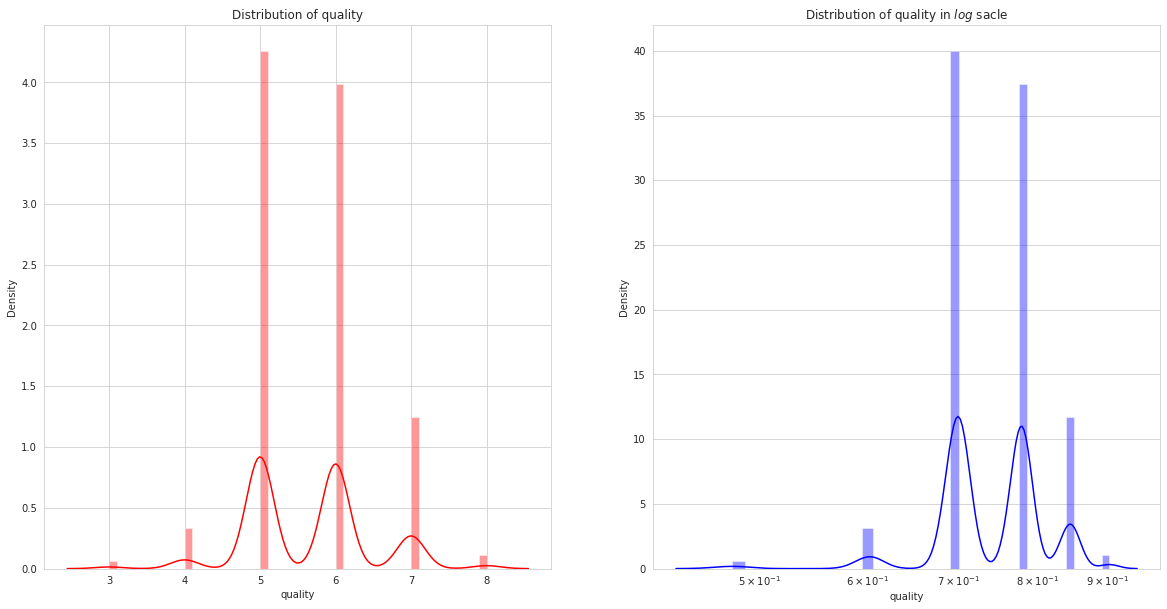

In [ ]:
f=plt.figure(figsize=(20,10))

ax=f.add_subplot(121)
snus.distplot(y,bins=50,color='r',ax=ax)
ax.set_title('Distribution of quality')

ax=f.add_subplot(122)
snus.distplot(np.log10(y),bins=40,color='b',ax=ax)
ax.set_title('Distribution of quality in $log$ sacle')
ax.set_xscale('log');

### **Some thoughts about metrics**

We have different metrics:

1.   **accuracy** - In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
2.   **recall** - The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. 

3. **precision** - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

4. **F1** - Precision is used with recall, the percent of all relevant documents that is returned by the search. The two measures are sometimes used together in the F1 Score (or f-measure) to provide a single measurement for a system.
5. **ROC AUC** - Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.



According to our task we have the problem of quality of wine. So there is two obvious problem: 


*   If we have bad wine, but expect the great (**precision**)
*   If we habe a great wine, but expect the bad (**recall**)

As we know, this metrics are included in **F1 score**, so our purpose - max this metric value.

And also it can be important the value of roc_auc.



## **KNeighborsClassifier**

Now we consider KNN-method of classification with standardize and without it. It helps us to understand, how we can level up our accuracy. 

### **Without StandardScaler()**

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn_1.fit(X_train, y_train)
y_pred = knn_1.predict(X_test)

In [ ]:
get_score(y_test, knn_1.predict(X_test), knn_1.predict_proba(X_test), multiclass=True)

{'accuracy': 0.596875,
 'f1': 0.3603546182866492,
 'precision': 0.35641351862725906,
 'recall': 0.36503778594771247,
 'roc_auc': 0.6190226715686274}

In [ ]:
models_1 = [{
              'model_instance': knn_1,
              'model_name': 'KNN (1) without standart'
          }]

In [ ]:
X_test_wos = X_test

Check the general metrics value for output prediction labels:

In [ ]:
print_score_table(X_test_wos, y_test, models_1, True)

,Model,accuracy,f1,precision,recall,roc_auc
0,KNN (1) without standart,0.596875,0.360355,0.356414,0.365038,0.619023


Let's consider more detailed. How exactly metrics evaluate the presicions which our model made for each classes:

In [ ]:
print_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[ 0  0  1  1  0  0]
 [ 1  0  6  3  1  0]
 [ 1  4 87 33 10  1]
 [ 0  5 34 79  9  1]
 [ 0  0  3 13 24  0]
 [ 0  0  0  1  1  1]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.64      0.65       136
           6       0.61      0.62      0.61       128
           7       0.53      0.60      0.56        40
           8       0.33      0.33      0.33         3

    accuracy                           0.60       320
   macro avg       0.36      0.37      0.36       320
weighted avg       0.60      0.60      0.60       320

Accuracy: 0.596875


As we can see, we have a problem with 2 classes (**3rd and 4th**). It can connects with the small number of samples

### **Within StandardScaller()**



Standardize our input data:

In [ ]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Without tuning:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

General evaluation on test set: 

In [ ]:
get_score(y_test, knn.predict(X_test), knn.predict_proba(X_test), multiclass=True)

{'accuracy': 0.625,
 'f1': 0.45145618433188606,
 'precision': 0.43556236074601146,
 'recall': 0.401361036838978,
 'roc_auc': 0.6408166221033869}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[ 0  1  0  1  0  0]
 [ 0  2  4  5  0  0]
 [ 0  5 90 31  9  1]
 [ 0  5 23 84 14  2]
 [ 0  1  4 10 23  2]
 [ 0  0  1  0  1  1]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.18      0.16        11
           5       0.74      0.66      0.70       136
           6       0.64      0.66      0.65       128
           7       0.49      0.57      0.53        40
           8       0.17      0.33      0.22         3

    accuracy                           0.62       320
   macro avg       0.36      0.40      0.38       320
weighted avg       0.64      0.62      0.63       320

Accuracy: 0.625


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


When we standardize our inputs, we help our model to be more sensitive to small deviations of parameter values, so we can see that model stil cannot find the samples with the worst quality, although it is here. Our metrics value are better then earlier.

In [ ]:
models = [{
              'model_instance': knn,
              'model_name': 'KNN (1)'
          }]

So, it can be clearly seen that with StandardScaler() we can make situation better, because all metrics are considerably higher, when we apply the standartization.  

In [ ]:
print_score_table(X_test_wos, y_test, models_1, True)

,Model,accuracy,f1,precision,recall,roc_auc
0,KNN (1) without standart,0.596875,0.360355,0.356414,0.365038,0.619023


In [ ]:
print_score_table(X_test, y_test, models, True)

,Model,accuracy,f1,precision,recall,roc_auc
0,KNN (1),0.625,0.451456,0.435562,0.401361,0.640817


So, f1 are better with standartization. Go next)

Let's see, how we can fix this not high accuracy. Tune!

Within tuning:

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 20, 2)),
    'weights': ['uniform', 'distance'],
    'leaf_size' : list(range(1,15,1)),
    'p' : [1,2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=2)
best_model = clf.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1,

Check the best params for knn:

In [ ]:
best_model.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'distance'}

General evaluation:

In [ ]:
get_score(y_test, best_model.predict(X_test), best_model.predict_proba(X_test), True)

{'accuracy': 0.66875,
 'f1': 0.4736479400749064,
 'precision': 0.4943238461149588,
 'recall': 0.38547283496732027,
 'roc_auc': 0.7377313460895721}

In [ ]:
models.append({ 'model_instance': best_model, 'model_name': 'Tuned KNN'})

So, we hame some changes: **f1**, **precision** and **recall** are approximately same, whereas we see the big difference in **roc auc score**. Remember the tune model for KNN

In [ ]:
print_score_table(X_test, y_test, models, True)

,Model,accuracy,f1,precision,recall,roc_auc
0,KNN (1),0.62500,0.451456,0.435562,0.401361,0.640817
1,Tuned KNN,0.66875,0.473648,0.494324,0.385473,0.737731


Check the confusion matrics and see how different metrics are evaluate the precision for each class in output data.

In [ ]:
print_confusion_matrix(y_test, best_model.predict(X_test))

Confusion Matrix:
[[ 0  0  1  1  0  0]
 [ 0  0  8  3  0  0]
 [ 0  0 99 35  2  0]
 [ 0  1 23 93 11  0]
 [ 0  0  0 18 21  1]
 [ 0  0  0  1  1  1]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.73      0.74       136
           6       0.62      0.73      0.67       128
           7       0.60      0.53      0.56        40
           8       0.50      0.33      0.40         3

    accuracy                           0.67       320
   macro avg       0.41      0.39      0.39       320
weighted avg       0.65      0.67      0.66       320

Accuracy: 0.66875


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **DecisionTreeClassifier**

Without tuning:

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

General evaluation:

In [ ]:
get_score(y_test, dt_clf.predict(X_test), dt_clf.predict_proba(X_test), multiclass=True)

{'accuracy': 0.615625,
 'f1': 0.36793459529680006,
 'precision': 0.3548712572150072,
 'recall': 0.39212251188354136,
 'roc_auc': 0.6352735071301248}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[ 0  1  0  0  1  0]
 [ 1  1  5  4  0  0]
 [ 0  6 91 33  5  1]
 [ 0  3 29 78 15  3]
 [ 0  0  2 11 26  1]
 [ 0  0  1  0  1  1]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.09      0.09      0.09        11
           5       0.71      0.67      0.69       136
           6       0.62      0.61      0.61       128
           7       0.54      0.65      0.59        40
           8       0.17      0.33      0.22         3

    accuracy                           0.62       320
   macro avg       0.35      0.39      0.37       320
weighted avg       0.62      0.62      0.62       320

Accuracy: 0.615625


Within tuning:

In [ ]:
params = {
    # 'max_depth': range(1, 10, 5),
    'min_samples_leaf': range(1, 5, 1),
    'min_samples_split': range(2, 5, 1),
    'criterion': ["gini", "entropy"],
    'splitter' :['best', 'random']
}
grid_search = GridSearchCV(estimator=dt_clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

Check the best params:

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

General evaluation:

In [ ]:
get_score(y_test, grid_search.predict(X_test), grid_search.predict_proba(X_test), True)

{'accuracy': 0.596875,
 'f1': 0.35702862732983215,
 'precision': 0.34751951407765364,
 'recall': 0.37315805109922756,
 'roc_auc': 0.6238948306595365}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, grid_search.predict(X_test))

Confusion Matrix:
[[244  29]
 [ 22  25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       273
           1       0.46      0.53      0.50        47

    accuracy                           0.84       320
   macro avg       0.69      0.71      0.70       320
weighted avg       0.85      0.84      0.85       320

Accuracy: 0.840625


Consider the tuned and not tuned models: 

In [ ]:
models_dt = [{
              'model_instance': dt_clf,
              'model_name': 'DT'
          },
          { 'model_instance': grid_search, 'model_name': 'Tuned DT'}]
print_score_table(X_test, y_test, models_dt, True)

,Model,accuracy,f1,precision,recall,roc_auc
0,DT,0.615625,0.367935,0.354871,0.392123,0.635274
1,Tuned DT,0.596875,0.357029,0.347520,0.373158,0.623895


I think it is great result (of course, not). It is very interesting why our tuned models make things worse. let's remember the based DecisionTree and use it later.

### **Feature importances**

So, we need to check feature importance. Let's see:

In [ ]:
feature_importances = pd.DataFrame(data = dt_clf.feature_importances_,index=df.drop(['quality'], axis=1).columns, columns=['quality'])
feature_importances = feature_importances.sort_values(by='quality', axis=0, ascending=True)

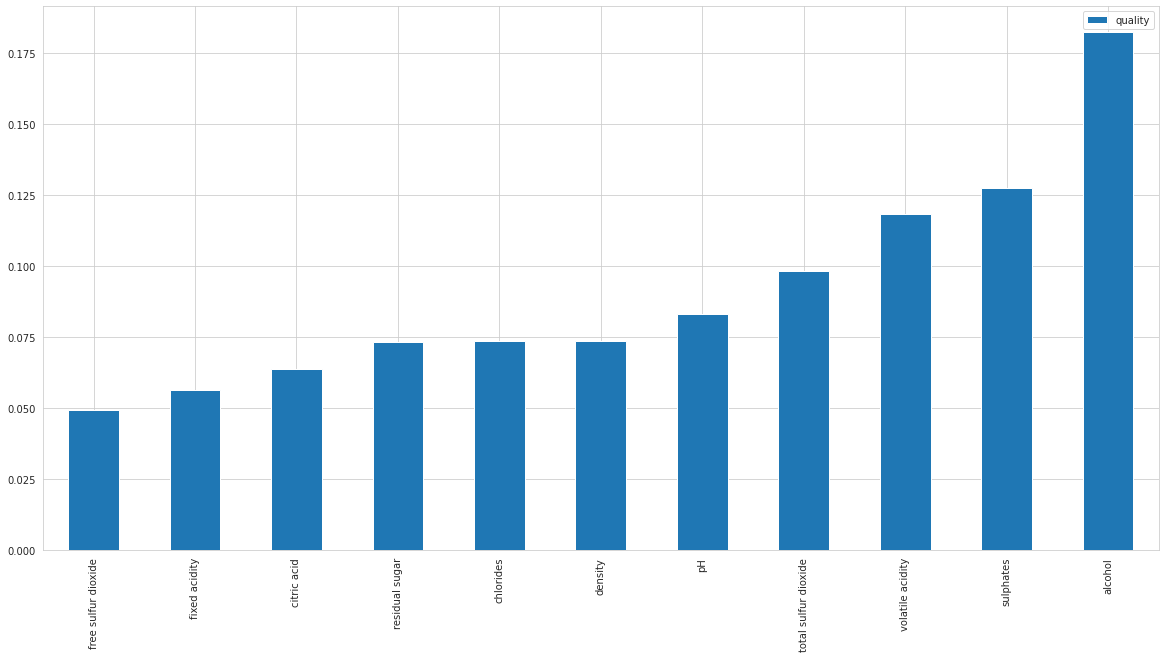

In [ ]:
feature_importances.plot(kind='bar', figsize=(20, 10))

It is quite interesting that 
alcohol content is the most important indicator in making a decision, whereas free sulfur dioxide are the least important.

## **SVM Classifier**

Without tuning:

In [ ]:
from sklearn import svm
svc_clf = SVC(kernel='linear', probability=True)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

General evaluation:

In [ ]:
get_score(y_test, dt_clf.predict(X_test), dt_clf.predict_proba(X_test), multiclass=True)

{'accuracy': 0.615625,
 'f1': 0.36793459529680006,
 'precision': 0.3548712572150072,
 'recall': 0.39212251188354136,
 'roc_auc': 0.6352735071301248}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[  0   0   1   1   0   0]
 [  0   0  10   1   0   0]
 [  0   0 105  31   0   0]
 [  0   0  50  78   0   0]
 [  0   0   2  38   0   0]
 [  0   0   0   3   0   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.77      0.69       136
           6       0.51      0.61      0.56       128
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         3

    accuracy                           0.57       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.47      0.57      0.52       320

Accuracy: 0.571875


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Within tuning:

In [ ]:
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']}
 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.551 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.590 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.605 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.609 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.573 total time=   0.2s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.427 total time=   0.8s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.551 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

Check best params:

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

General evaluation:

In [ ]:
get_score(y_test, grid.predict(X_test), grid.predict_proba(X_test), True)

{'accuracy': 0.625,
 'f1': 0.5977275967858408,
 'precision': 0.668483356774496,
 'recall': 0.2925551470588235,
 'roc_auc': 0.7889575093768568}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, grid.predict(X_test))

Confusion Matrix:
[[271   2]
 [ 33  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       273
           1       0.88      0.30      0.44        47

    accuracy                           0.89       320
   macro avg       0.88      0.65      0.69       320
weighted avg       0.89      0.89      0.87       320

Accuracy: 0.890625


Consider the results:

In [ ]:
models_svm = [{
              'model_instance': svc_clf,
              'model_name': 'SVM'
          },
          { 'model_instance': grid, 'model_name': 'Tuned SVM'}]
print_score_table(X_test, y_test, models_svm, True)

,Model,accuracy,f1,precision,recall,roc_auc
0,SVM,0.571875,0.623966,0.569079,0.230239,0.711229
1,Tuned SVM,0.625000,0.597728,0.668483,0.292555,0.788958


So, we can see, that the **accuracy** for tuned SVM are higher than for based as for **roc_auc**, but the value of **f1 score** are higher for based SVM.

## **Consider the models**

In [ ]:
models_result = models+models_dt+models_svm
table = print_score_table(X_test, y_test, models_result, True)

In [ ]:
table.sort_values(by='f1', ascending=False)

,Model,accuracy,f1,precision,recall,roc_auc
4,SVM,0.571875,0.623966,0.569079,0.230239,0.711229
5,Tuned SVM,0.625000,0.597728,0.668483,0.292555,0.788958
1,Tuned KNN,0.668750,0.473648,0.494324,0.385473,0.737731
0,KNN (1),0.625000,0.451456,0.435562,0.401361,0.640817
2,DT,0.615625,0.367935,0.354871,0.392123,0.635274
3,Tuned DT,0.596875,0.357029,0.347520,0.373158,0.623895


So, we can see that the most powerful model according to **f1 score** is classical SVM. However, this model loses to tuned SVM in all other metrics. The key idea is that the ***SVM approach are more resorseful for this data.*** 

# **Part 2**

## **Data**

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')
df_copy = df.copy()
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Reorginise our data:

In [ ]:
new_quality_col = []
for val in df_copy['quality']:
  if val > 6.5:
    new_quality_col.append(1)
  else:
    new_quality_col.append(0)
df_copy['quality>6.5'] = new_quality_col
df_copy.drop('quality', axis=1, inplace=True)
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality>6.5
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
X = df_copy.drop('quality>6.5', axis=1)
y = df_copy['quality>6.5']

In [ ]:
np.random.seed(42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **KNeighborsClassifier**

Now we consider KNN-method of classification with standardize and without it. It helps us to understand, how we can level up our accuracy. 

### **Without StandardScaler()**

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn_1.fit(X_train, y_train)
y_pred = knn_1.predict(X_test)

In [ ]:
get_score(y_test, knn_1.predict(X_test), knn_1.predict_proba(X_test))

{'accuracy': 0.853125,
 'f1': 0.6989531415760923,
 'precision': 0.7047101449275363,
 'recall': 0.693749512898449,
 'roc_auc': 0.693749512898449}

In [ ]:
models_1 = [{
              'model_instance': knn_1,
              'model_name': 'KNN (1) without standart'
          }]

In [ ]:
X_test_wos = X_test

Check the general metrics value for output prediction labels:

In [ ]:
print_score_table(X_test_wos, y_test, models_1, False)

,Model,accuracy,f1,precision,recall,roc_auc
0,KNN (1) without standart,0.853125,0.698953,0.70471,0.69375,0.69375


let's consider more detail. How exactly metrics evaluate the presicions which our model made for each classes:

In [ ]:
print_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[251  22]
 [ 25  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       273
           1       0.50      0.47      0.48        47

    accuracy                           0.85       320
   macro avg       0.70      0.69      0.70       320
weighted avg       0.85      0.85      0.85       320

Accuracy: 0.853125


As we can see, we have a problem with 2 classes (**3rd and 4th**). It can connects with the small number of samples

### **Within StandardScaller()**



Standardize our input data:

In [ ]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Without tuning:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

General evaluation on test set: 

In [ ]:
get_score(y_test, knn.predict(X_test), knn.predict_proba(X_test))

{'accuracy': 0.890625,
 'f1': 0.7798352696035069,
 'precision': 0.7823706759758806,
 'recall': 0.7773751071623412,
 'roc_auc': 0.7773751071623413}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[256  17]
 [ 18  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.63      0.62      0.62        47

    accuracy                           0.89       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.89      0.89      0.89       320

Accuracy: 0.890625


When we standardize our inputs, we help our model to be more sensitive to small deviations of parameter values, so we can see that model stil cannot find the samples with the worst quality, although it is here. Our metrics value are better then earlier.

In [ ]:
models = [{
              'model_instance': knn,
              'model_name': 'KNN (1)'
          }]

So, it can be clearly seen that with StandardScaler() we can make situation better, because all metrics are considerably higher, when we apply the standartization.  

In [ ]:
print_score_table(X_test_wos, y_test, models_1, False)

,Model,accuracy,f1,precision,recall,roc_auc
0,KNN (1) without standart,0.853125,0.698953,0.70471,0.69375,0.69375


In [ ]:
print_score_table(X_test, y_test, models, False)

,Model,accuracy,f1,precision,recall,roc_auc
0,KNN (1),0.890625,0.779835,0.782371,0.777375,0.777375


So, f1 are better with standartization. Go next)

Let's see, how we can fix this not high accuracy. Tune!

Within tuning:

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 20, 2)),
    'weights': ['uniform', 'distance'],
    'leaf_size' : list(range(1,15,1)),
    'p' : [1,2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=2)
best_model = clf.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=4, n_neighbors=1,

Check the best params for knn:

In [ ]:
best_model.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 13,
 'p': 1,
 'weights': 'distance'}

General evaluation:

In [ ]:
get_score(y_test, best_model.predict(X_test), best_model.predict_proba(X_test))

{'accuracy': 0.909375,
 'f1': 0.8032856385797562,
 'precision': 0.8347331093691676,
 'recall': 0.7795573221105137,
 'roc_auc': 0.9457563712882862}

In [ ]:
models.append({ 'model_instance': best_model, 'model_name': 'Tuned KNN'})

So, we hame some changes: **f1**, **precision** and **recall** are approximately same, whereas we see the big difference in **roc auc score**. Remember the tune model for KNN

In [ ]:
print_score_table(X_test, y_test, models, False)

,Model,accuracy,f1,precision,recall,roc_auc
0,KNN (1),0.890625,0.779835,0.782371,0.777375,0.777375
1,Tuned KNN,0.909375,0.803286,0.834733,0.779557,0.945756


Check the confusion matrics and see how different metrics are evaluate the precision for each class in output data.

In [ ]:
print_confusion_matrix(y_test, best_model.predict(X_test))

Confusion Matrix:
[[263  10]
 [ 19  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       273
           1       0.74      0.60      0.66        47

    accuracy                           0.91       320
   macro avg       0.83      0.78      0.80       320
weighted avg       0.90      0.91      0.91       320

Accuracy: 0.909375


## **DecisionTreeClassifier**

Without tuning:

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

General evaluation:

In [ ]:
get_score(y_test, dt_clf.predict(X_test), dt_clf.predict_proba(X_test))

{'accuracy': 0.878125,
 'f1': 0.7589570255915017,
 'precision': 0.7567401960784315,
 'recall': 0.7612423037954953,
 'roc_auc': 0.7612423037954954}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[253  20]
 [ 19  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       273
           1       0.58      0.60      0.59        47

    accuracy                           0.88       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.88      0.88      0.88       320

Accuracy: 0.878125


Within tuning:

In [ ]:
params = {
    # 'max_depth': range(1, 10, 5),
    'min_samples_leaf': range(1, 5, 1),
    'min_samples_split': range(2, 5, 1),
    'criterion': ["gini", "entropy"],
    'splitter' :['best', 'random']
}
grid_search = GridSearchCV(estimator=dt_clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "f1")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=1)

Check the best params:

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

General evaluation:

In [ ]:
get_score(y_test, grid_search.predict(X_test), grid_search.predict_proba(X_test))

{'accuracy': 0.840625,
 'f1': 0.7002149194511288,
 'precision': 0.6901280980228348,
 'recall': 0.7128438936949575,
 'roc_auc': 0.7128438936949576}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, grid_search.predict(X_test))

Confusion Matrix:
[[244  29]
 [ 22  25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       273
           1       0.46      0.53      0.50        47

    accuracy                           0.84       320
   macro avg       0.69      0.71      0.70       320
weighted avg       0.85      0.84      0.85       320

Accuracy: 0.840625


Consider the tuned and not tuned models: 

In [ ]:
models_dt = [{
              'model_instance': dt_clf,
              'model_name': 'DT'
          },
          { 'model_instance': grid_search, 'model_name': 'Tuned DT'}]
print_score_table(X_test, y_test, models_dt, False)

,Model,accuracy,f1,precision,recall,roc_auc
0,DT,0.878125,0.758957,0.756740,0.761242,0.761242
1,Tuned DT,0.840625,0.700215,0.690128,0.712844,0.712844


I think it is great result (of course, not). It is very interesting why our tuned models make things worse. let's remember the based DecisionTree and use it later.

### **Feature importances**

So, we need to check feature importance. Let's see:

In [ ]:
feature_importances = pd.DataFrame(data = dt_clf.feature_importances_,index=df.drop(['quality'], axis=1).columns, columns=['quality'])
feature_importances = feature_importances.sort_values(by='quality', axis=0, ascending=True)

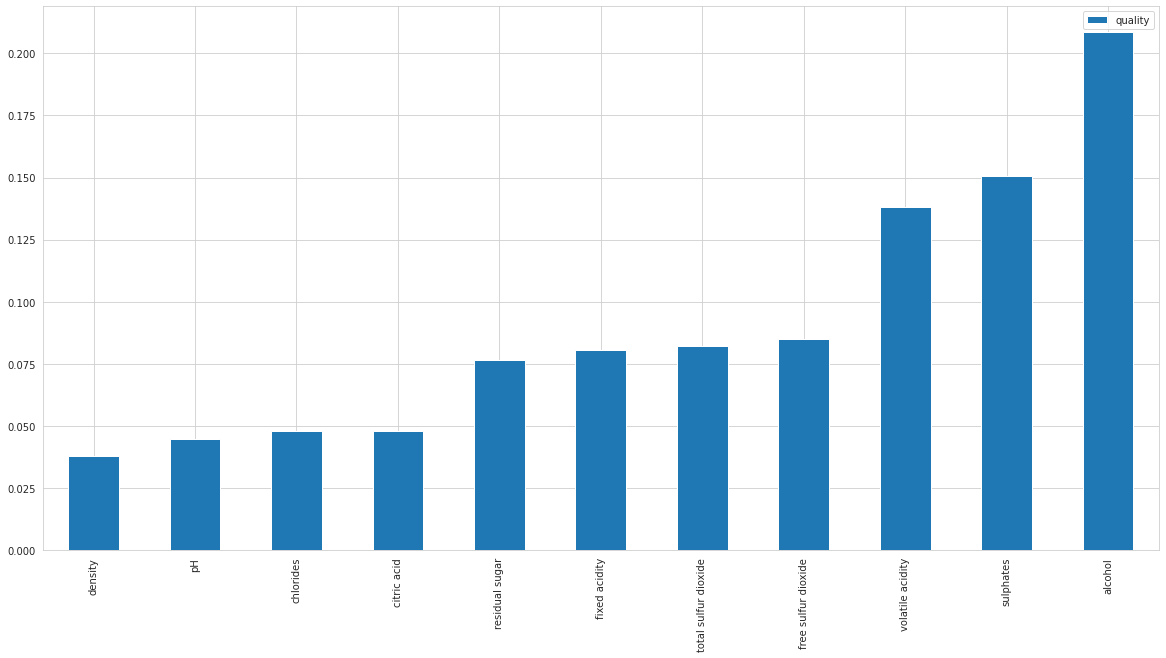

In [ ]:
feature_importances.plot(kind='bar', figsize=(20, 10))

It is quite interesting that 
alcohol content is the most important indicator in making a decision, whereas free sulfur dioxide are the least important.

## **SVM Classifier**

Without tuning:

In [ ]:
from sklearn import svm
svc_clf = SVC(kernel='linear', probability=True)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

General evaluation:

In [ ]:
get_score(y_test, dt_clf.predict(X_test), dt_clf.predict_proba(X_test))

{'accuracy': 0.878125,
 'f1': 0.7589570255915017,
 'precision': 0.7567401960784315,
 'recall': 0.7612423037954953,
 'roc_auc': 0.7612423037954954}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[273   0]
 [ 47   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320

Accuracy: 0.853125


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Within tuning:

In [ ]:
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']}
 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.3s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.867 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

Check best params:

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

General evaluation:

In [ ]:
get_score(y_test, grid.predict(X_test), grid.predict_proba(X_test))

{'accuracy': 0.890625,
 'f1': 0.6918929327941459,
 'precision': 0.8832236842105263,
 'recall': 0.6452731665497623,
 'roc_auc': 0.9313381653807186}

Detail evaluation:

In [ ]:
print_confusion_matrix(y_test, grid.predict(X_test))

Confusion Matrix:
[[271   2]
 [ 33  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       273
           1       0.88      0.30      0.44        47

    accuracy                           0.89       320
   macro avg       0.88      0.65      0.69       320
weighted avg       0.89      0.89      0.87       320

Accuracy: 0.890625


Consider the results:

In [ ]:
models_svm = [{
              'model_instance': svc_clf,
              'model_name': 'SVM'
          },
          { 'model_instance': grid, 'model_name': 'Tuned SVM'}]
print_score_table(X_test, y_test, models_svm, False)

,Model,accuracy,f1,precision,recall,roc_auc
0,SVM,0.853125,0.920742,0.853125,0.500000,0.856909
1,Tuned SVM,0.890625,0.691893,0.883224,0.645273,0.931338


So, we can see, that the **accuracy** for tuned SVM are higher than for classical, as for **roc_auc**, but the value of **f1 score** are higher for classical SVM.

## **Consider the models**

In [ ]:
models_result = models+models_dt+models_svm
table = print_score_table(X_test, y_test, models_result)

In [ ]:
table.sort_values(by='f1', ascending=False)

,Model,accuracy,f1,precision,recall,roc_auc
4,SVM,0.853125,0.920742,0.853125,0.500000,0.856909
1,Tuned KNN,0.909375,0.803286,0.834733,0.779557,0.945756
0,KNN (1),0.890625,0.779835,0.782371,0.777375,0.777375
2,DT,0.878125,0.758957,0.756740,0.761242,0.761242
3,Tuned DT,0.840625,0.700215,0.690128,0.712844,0.712844
5,Tuned SVM,0.890625,0.691893,0.883224,0.645273,0.931338


So, we can see that the most effective model according to **f1 score** is **classical SVM**. However, this model loses to tuned KNN in almost all other metrics. For example, the value for accuracy and roc_auc are much higher for knn rather than for SVM. So the idea that we should decide what is much important for us. 